In [1]:
import pandas as pd
%matplotlib inline
import warnings
import sklearn

-------------------------этап подготовки данных--------------------------------

In [2]:
money = pd.read_csv('C:\\Users\PycharmProjects\linear_regression\ML Model\\USD_CURRENCY_HISTORY.csv')

In [3]:
past = 7 * 4
future = 7
salary = [10000, 20000, 30000, 40000, 50000]
value = money['curs']
len(value)

409

In [4]:
start = past
end = len(value)  - future

In [5]:
raw_df = [] 
for i in range(start,end):
    past_and_future_value = value[(i-past):(i+future)]   # для каждого элемента i (каждого дня) вводим переменную 
    # (временной диапазон за 28 дней до и 7 дней после для каждого дня
    raw_df.append(list(past_and_future_value))

In [6]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]


In [7]:
df = pd.DataFrame(raw_df, columns=past_columns+future_columns)
df.head(5)

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000


In [8]:
X = df[past_columns][:-1]   # на данные, на основе которых мы будем делать предсказание, не вклюбчая последний ряд (строчка)
y = df[future_columns][:-1] # на данные, которые мы будем предсказывать
X_test = df[past_columns][-1:]   # тестовые данные для проверки модели
y_test = df[future_columns][-1:] 
y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
373,65.6196,65.6046,65.9735,66.2608,66.4127,66.7471,66.4897


In [9]:
y_test.iloc[0]

future_0    65.6196
future_1    65.6046
future_2    65.9735
future_3    66.2608
future_4    66.4127
future_5    66.7471
future_6    66.4897
Name: 373, dtype: float64

In [10]:
list(y_test.iloc[0])

[65.6196, 65.6046, 65.9735, 66.2608, 66.4127, 66.7471, 66.4897]

-----------------обучение модели--------------------------------------------

In [11]:
from sklearn.linear_model import LinearRegression
LinReg  = LinearRegression()
LinReg.fit(X,y)# метод fit для обучения модели
LinReg.predict(X_test) # предсказанные результаты - массив массивов
prediction = LinReg.predict(X_test)[0] # массив, если взять только первый элемент из LinReg.predict(X_test)
list(prediction)

[66.255999794934752,
 66.302815103539672,
 66.326570906206825,
 66.31823111344363,
 66.274208066962586,
 66.206925922119552,
 66.178591856498826]

In [12]:
import numpy as np
np.array([prediction])

array([[ 66.25599979,  66.3028151 ,  66.32657091,  66.31823111,
         66.27420807,  66.20692592,  66.17859186]])

In [13]:
np.linalg.norm(y_test - prediction) # отклонение данных

1.1950827395156198

In [14]:
#sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))
#sklearn.metrics.mean_absolute_error(np.array([y_test.iloc[0]]), np.array([prediction]))
sklearn.metrics.mean_absolute_error(y_test.iloc[0], prediction)

0.39069872464912897

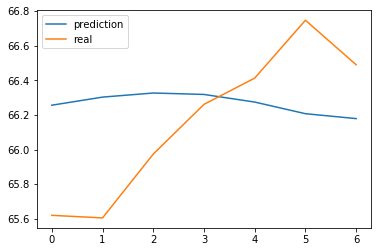

In [15]:
import matplotlib.pyplot as plt
plt.plot(prediction, label="prediction")
plt.plot(list(y_test.iloc[0]), label="real")
#plt.plot(y_test, label="real")
plt.legend()

In [16]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=1)
KNN.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

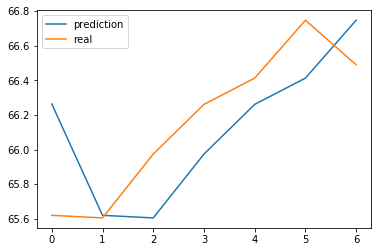

In [17]:
prediction = KNN.predict(X_test)[0]
plt.plot(prediction, label="prediction")
plt.plot(list(y_test.iloc[0]), label="real")
#plt.plot(y_test, label="real")
plt.legend()

In [18]:
sklearn.metrics.mean_absolute_error(y_test.iloc[0], prediction)

0.29404285714285755

In [19]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter = 2000)
MLP
MLP.fit(X,y)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

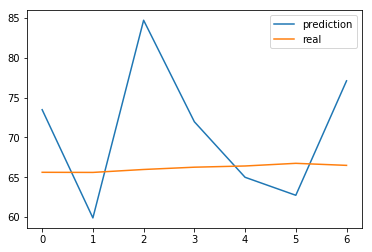

In [20]:
prediction = MLP.predict(X_test)[0]
plt.plot(prediction, label="prediction")
plt.plot(list(y_test.iloc[0]), label="real")
#plt.plot(y_test, label="real")
plt.legend()






In [21]:
sklearn.metrics.mean_absolute_error(y_test.iloc[0], prediction)

7.7260838173866251